In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline 

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
train_data = pd.read_csv('/input/heartbeat/mitbih_train.csv',header = None)

In [ ]:
test_data = pd.read_csv('/input/heartbeat/mitbih_train.csv', header = None) 

In [ ]:
train_target = train_data[187].value_counts()

In [ ]:
train_target

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

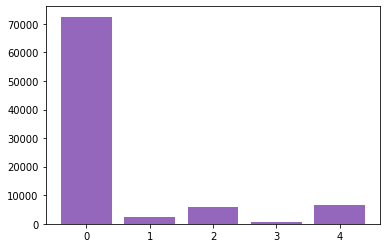

In [ ]:
plt.bar(train_target.index,train_target.values, color = sb.color_palette()[4]);

In [ ]:
np.random.seed(2018)
sample = np.random.choice(train_data.shape[0], 200, replace = False)
subset = train_data.loc[sample]

In [ ]:
subset

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
64457,0.962963,0.811966,0.279202,0.025641,0.074074,0.085470,0.022792,0.005698,0.025641,0.022792,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
36271,0.979487,0.561538,0.353846,0.233333,0.135897,0.074359,0.033333,0.023077,0.017949,0.017949,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
27479,0.960000,0.792000,0.468000,0.060000,0.000000,0.152000,0.196000,0.236000,0.256000,0.268000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
26599,0.988920,0.858726,0.412742,0.000000,0.199446,0.304709,0.373961,0.409972,0.423823,0.385042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
13752,1.000000,0.624060,0.067669,0.112782,0.187970,0.142857,0.131579,0.090226,0.056391,0.071429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77146,0.412451,0.396887,0.289235,0.130999,0.154345,0.178988,0.097276,0.035019,0.020752,0.000000,...,0.884565,0.684825,0.503243,0.343709,0.300908,0.313878,0.338521,0.352789,0.351492,2.0
26244,0.969091,0.863636,0.627273,0.356364,0.121818,0.034545,0.040000,0.061818,0.080000,0.089091,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
12805,1.000000,0.976190,0.608844,0.000000,0.017007,0.085034,0.112245,0.098639,0.125850,0.115646,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
37083,1.000000,0.779070,0.209302,0.050388,0.065891,0.093023,0.077519,0.124031,0.174419,0.131783,...,0.217054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
percentages = [count / subset.shape[0] * 100 for count in subset[187].value_counts()]
percentages[0]

79.5

In [ ]:
for i in np.arange(len(percentages)):
    print(f'the precent of {int(train_target.index[i])} is : {np.round(percentages[i], 2) } %')

the precent of 0 is : 79.5 %
the precent of 4 is : 10.5 %
the precent of 2 is : 5.5 %
the precent of 1 is : 4.0 %
the precent of 3 is : 0.5 %


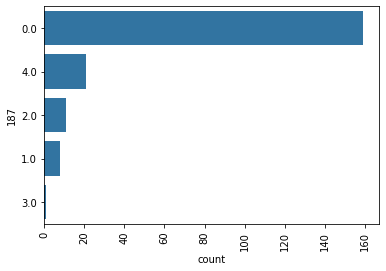

In [ ]:
base_color = sb.color_palette()[0]
type_orderion = subset[187].value_counts().index
sb.countplot(data = subset, y = 187, color = base_color, order = type_orderion );
plt.xticks(rotation = 90);

In [ ]:
from sklearn.utils import resample
target1=train_data[train_data[187]==1]
target2=train_data[train_data[187]==2]
target3=train_data[train_data[187]==3]
target4=train_data[train_data[187]==4]
target0=(train_data[train_data[187]==0]).sample(n=20000,random_state=42)

target1_sample=resample(target1,replace=True,n_samples=20000,random_state=0)
target2_sample=resample(target2,replace=True,n_samples=20000,random_state=0)
target3_sample=resample(target3,replace=True,n_samples=20000,random_state=0)
target4_sample=resample(target4,replace=True,n_samples=20000,random_state=0)

train_data=pd.concat([target0,target1_sample,target2_sample,target3_sample,target4_sample])


In [ ]:
train_target = train_data[187].value_counts()

In [ ]:
train_target

0.0    20000
1.0    20000
2.0    20000
3.0    20000
4.0    20000
Name: 187, dtype: int64

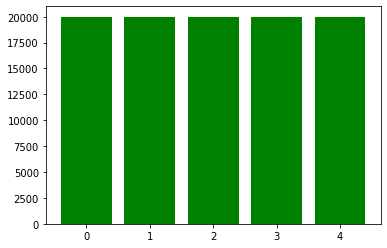

In [ ]:
plt.bar(train_target.index,train_target.values, color = 'green');

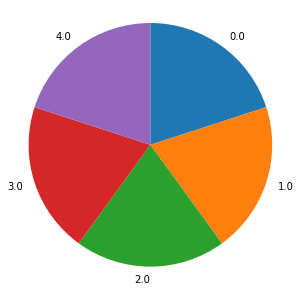

In [ ]:
sorted_counts = train_data[187].value_counts();
plt.figure(figsize = [12,5.01])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

In [ ]:
test_target = test_data[187].value_counts()

In [ ]:
test_target

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

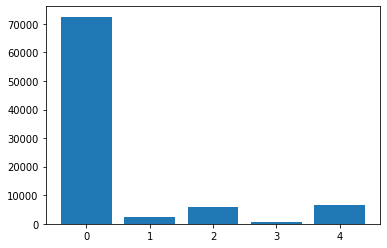

In [ ]:
plt.bar(test_target.index,test_target.values, color = sb.color_palette()[0]);

In [ ]:
np.random.seed(2020)
sample2 = np.random.choice(test_data.shape[0], 200, replace = False)
subset2 = test_data.loc[sample2]

In [ ]:
percentages = [count / subset2.shape[0] * 100 for count in subset2[187].value_counts()]
percentages[0]

81.5

In [ ]:
for i in np.arange(len(percentages)):
    print(f'the precent of {int(test_data.index[i])} is : {np.round(percentages[i], 2) } %')

the precent of 0 is : 81.5 %
the precent of 1 is : 8.5 %
the precent of 2 is : 8.0 %
the precent of 3 is : 2.0 %


In [ ]:
from scipy import stats

In [ ]:
pearson_coef, p_value = stats.pearsonr(train_data[1], train_data[187])

In [ ]:
l = [('1', 1),('2',2),('3',3)]

In [ ]:
if max(l):
    print(l)

[('1', 1), ('2', 2), ('3', 3)]


In [ ]:
max(l)

('3', 3)

In [ ]:
effictive_list = []
for i in train_data.columns:
    if i != 187:
        pearson_coef, p_value = stats.pearsonr(train_data[i], train_data[187])
        effictive_list.append((f'column number : {i}', f'Pearson Correlation {pearson_coef}', f'P-value : {p_value}'))
    else: break

In [ ]:
print('*' * 75)
print(max(effictive_list))
print('*' * 75)

***************************************************************************
('column number : 99', 'Pearson Correlation 0.29915973057729756', 'P-value : 0.0')
***************************************************************************


Text(0, 0.5, 'time in seconds')

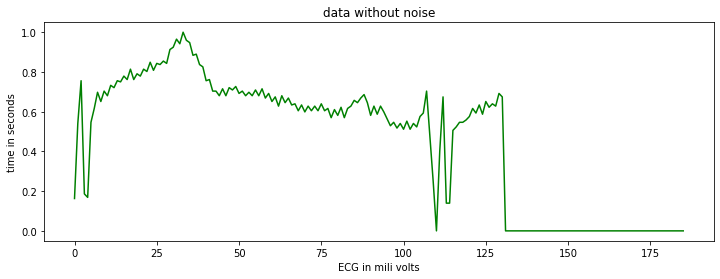

In [ ]:
def add_guassian_noise(signal):
    noise = np.random.normal(0,0.05,186)
    return(signal + noise)
noise_data = add_guassian_noise(train_data.iloc[0,:186])
plt.figure(figsize = [12,4.02])
plt.plot(train_data.iloc[0,:186], color = 'green')
plt.title('data without noise')
plt.xlabel('ECG in mili volts')
plt.ylabel('time in seconds')

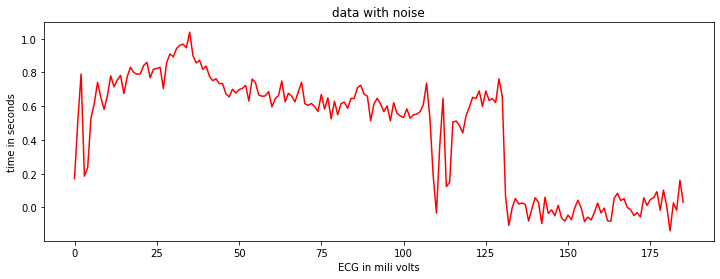

In [ ]:
plt.figure(figsize = [12,4.02])
plt.plot(noise_data, color = 'red')
plt.title('data with noise')
plt.xlabel('ECG in mili volts')
plt.ylabel('time in seconds')
plt.show()

In [ ]:
len(train_data.columns)/60

3.1333333333333333

In [ ]:
df = train_data.copy()

In [ ]:
counter = 0
while counter <= len(df.columns):
    if counter != 186:
        df[counter] = df[counter] + df[counter + 1] + df[counter + 2] 
        counter += 3
    else: break


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10153,1.459302,0.540698,0.755814,0.901163,0.168605,0.546512,1.965116,0.697674,0.651163,2.116279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33886,2.273179,0.938742,0.344371,0.639073,0.273179,0.331126,1.014901,0.341060,0.347682,1.036424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32005,2.496487,0.932084,0.590164,0.313817,0.014052,0.168618,0.646370,0.210773,0.196721,0.627635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56159,2.228495,0.723118,0.526882,0.677419,0.220430,0.158602,0.263441,0.091398,0.080645,0.255376,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61783,1.732984,0.709424,0.060209,0.112565,0.057592,0.041885,0.120419,0.034031,0.039267,0.138743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


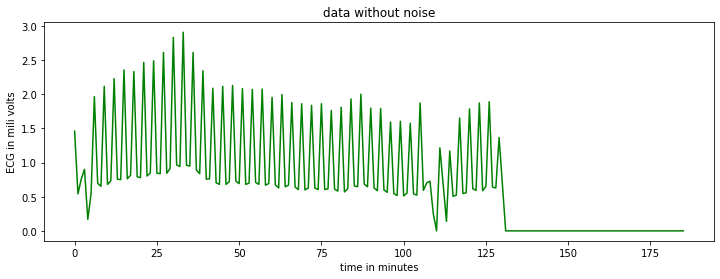

In [ ]:
plt.figure(figsize = [12,4.02])
plt.plot(df.iloc[0,:186], color = 'green')
plt.title('data without noise');
plt.ylabel('ECG in mili volts');
plt.xlabel('time in minutes');

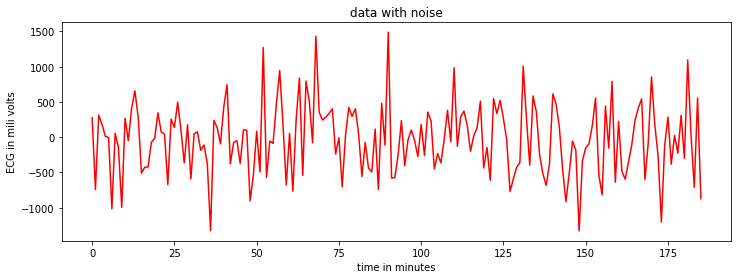

In [ ]:
def add_guassian_noise2(signal):
    noise = np.random.normal(0,500,186)
    return(signal + noise)
plt.figure(figsize = [12,4.02])
plt.plot(add_guassian_noise2(df.iloc[0,:186]), color = 'red')
plt.title('data with noise')
plt.ylabel('ECG in mili volts')
plt.xlabel('time in minutes')
plt.show()

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10153,1.459302,0.540698,0.755814,0.901163,0.168605,0.546512,1.965116,0.697674,0.651163,2.116279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33886,2.273179,0.938742,0.344371,0.639073,0.273179,0.331126,1.014901,0.341060,0.347682,1.036424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32005,2.496487,0.932084,0.590164,0.313817,0.014052,0.168618,0.646370,0.210773,0.196721,0.627635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56159,2.228495,0.723118,0.526882,0.677419,0.220430,0.158602,0.263441,0.091398,0.080645,0.255376,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61783,1.732984,0.709424,0.060209,0.112565,0.057592,0.041885,0.120419,0.034031,0.039267,0.138743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x = train_data.iloc[0,:].values

In [ ]:
from numpy.fft import fft, ifft

In [ ]:
x = train_data.iloc[0,:]
X = fft(x)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


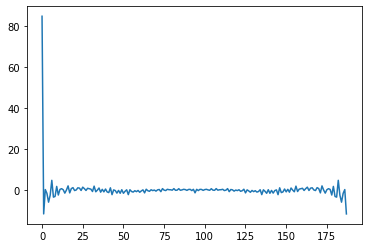

In [ ]:
plt.plot(X)

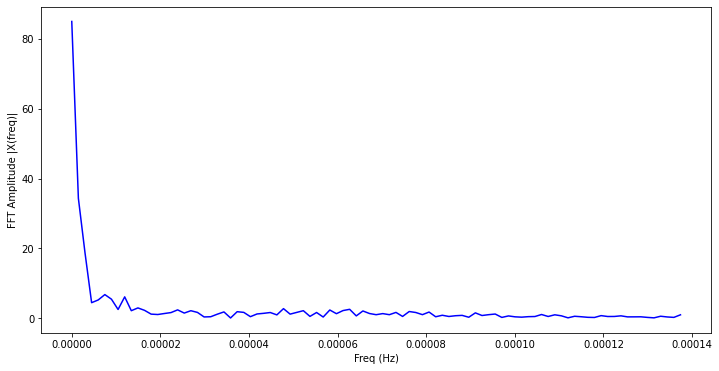

In [ ]:
X = fft(train_data.iloc[0,:186])
N = len(X)
n = np.arange(N)
# get the sampling rate
sr = 1 / (60*60)
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [ ]:
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

In [ ]:
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10);

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


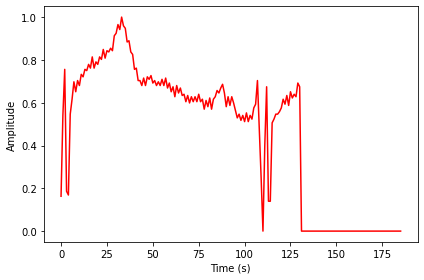

In [ ]:
plt.plot(ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


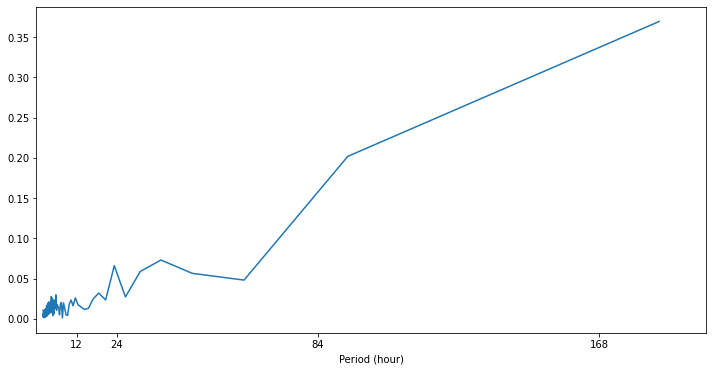

In [ ]:
t_h = 1/f_oneside / (60 * 60)

plt.figure(figsize=(12,6))
plt.plot(t_h, np.abs(X[:n_oneside])/n_oneside)
plt.xticks([12, 24, 84, 168])
plt.xlim(0, 200)
plt.xlabel('Period (hour)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train = train_data.drop(187, axis=1)
y_train = train_data[187]

In [ ]:
X_test = test_data.drop(187, axis=1)
y_test = test_data[187]

In [ ]:
X_train = X_train.values
y_train = y_train.values

In [ ]:
X_test = X_test.values
y_test = y_test.values

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

pd.DataFrame(np.asarray((unique, counts)).T)

,0,1
0,0.0,20000.0
1,1.0,20000.0
2,2.0,20000.0
3,3.0,20000.0
4,4.0,20000.0


In [ ]:
val = X_train[0][1]

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [ ]:
norm = Normalizer()
std = StandardScaler()

In [ ]:
val1 = norm.fit_transform([[val]])
val2 = std.fit_transform([[val]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [ ]:
models = {
    "LR": LogisticRegression(solver='liblinear'),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()

}

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
pip install scikit-learn  -U

In [ ]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))    
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))     
    
    
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    
    
    
    print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.77789
Testing Accuracy: 0.7782
Testing Confusion Matrix: 
[[1262  280  219  183   56]
 [ 382 1449   90   58   21]
 [ 189   69 1460  189   93]
 [ 119   22   96 1758    5]
 [  50   12   69   16 1853]]
Recall Score :  0.7782
Precision Score :  0.7782
Testing F-1: 0.7782
Testing F-Beta: 0.7782
------------------------------
Training Model KNN 
--------------


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Training Accuracy: 0.98929
Testing Accuracy: 0.9861
Testing Confusion Matrix: 
[[1880   55   41   16    8]
 [   0 2000    0    0    0]
 [  11    0 1986    2    1]
 [   0    0    0 2000    0]
 [   4    0    1    0 1995]]
Recall Score :  0.9861
Precision Score :  0.9861
Testing F-1: 0.9861
Testing F-Beta: 0.9861
------------------------------
Training Model DT 
--------------


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Training Accuracy: 1.0
Testing Accuracy: 0.9907
Testing Confusion Matrix: 
[[1907   29   36   11   17]
 [   0 2000    0    0    0]
 [   0    0 2000    0    0]
 [   0    0    0 2000    0]
 [   0    0    0    0 2000]]
Recall Score :  0.9907
Precision Score :  0.9907
Testing F-1: 0.9907
Testing F-Beta: 0.9907
------------------------------
Training Model RF 
--------------


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Training Accuracy: 1.0
Testing Accuracy: 0.9988
Testing Confusion Matrix: 
[[1988    4    6    2    0]
 [   0 2000    0    0    0]
 [   0    0 2000    0    0]
 [   0    0    0 2000    0]
 [   0    0    0    0 2000]]
Recall Score :  0.9988
Precision Score :  0.9988
Testing F-1: 0.9988
Testing F-Beta: 0.9988000000000001
------------------------------
Training Model XGB 
--------------


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:23:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 0.99968
Testing Accuracy: 0.9967
Testing Confusion Matrix: 
[[1967   18    9    5    1]
 [   0 2000    0    0    0]
 [   0    0 2000    0    0]
 [   0    0    0 2000    0]
 [   0    0    0    0 2000]]
Recall Score :  0.9967
Precision Score :  0.9967
Testing F-1: 0.9967
Testing F-Beta: 0.9966999999999999
------------------------------
Training Model Naive Bayes 
--------------
Training Accuracy: 0.45545
Testing Accuracy: 0.4518
Testing Confusion Matrix: 
[[ 198   12  130  318 1342]
 [ 101  245  162  191 1301]
 [ 157   22  404   80 1337]
 [   4    6   16 1696  278]
 [   0    0    6   19 1975]]
Recall Score :  0.4518
Precision Score :  0.4518
Testing F-1: 0.4518
Testing F-Beta: 0.4518
------------------------------
Traini

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Training Accuracy: 0.94759
Testing Accuracy: 0.9498
Testing Confusion Matrix: 
[[1804   76   21   92    7]
 [ 135 1847    9    7    2]
 [  38    7 1902   48    5]
 [  15    0    8 1977    0]
 [   9    8   12    3 1968]]
Recall Score :  0.9498
Precision Score :  0.9498
Testing F-1: 0.9498000000000001
Testing F-Beta: 0.9498
------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
model = XGBClassifier()

In [ ]:
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:55:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.67%


In [ ]:
rounded_y = np.round(y_pred)

In [ ]:
unique = pd.DataFrame(y_test)

In [ ]:
unique[0].unique()

array([0., 1., 2., 3., 4.])

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
y_unique = unique[0].unique()
mcm = multilabel_confusion_matrix(y_test, y_pred, labels = y_unique)
mcm

array([[[8000,    0],
        [  33, 1967]],

       [[7982,   18],
        [   0, 2000]],

       [[7991,    9],
        [   0, 2000]],

       [[7995,    5],
        [   0, 2000]],

       [[7999,    1],
        [   0, 2000]]])

In [ ]:
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10, n_jobs = -1)
# print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
# pd.DataFrame(accuracies)

In [ ]:
from sklearn.model_selection import  GridSearchCV

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
}

In [ ]:
# grid_search = GridSearchCV(estimator = model, param_grid = params, scoring = 'accuracy', cv = 10, n_jobs= -1)

In [ ]:
import tqdm

In [ ]:
import time

In [ ]:
# for i in time:
# #   tqdm(grid_search = grid_search.fit(X_train, y_train))

In [ ]:
# best_accuracy = grid_search.best_score_
# bets_params = grid_search.best_params_

In [ ]:
# print(f'the best accuracy is {best_accuracy} % while the recommanded parameters is : {bets_params}')

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')
# import numpy as np
# import pandas as pd
# from datetime import datetime
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import StratifiedKFold
# from xgboost import XGBClassifier

In [ ]:
# def timer(start_time=None):
#     if not start_time:
#         start_time = datetime.now()
#         return start_time
#     elif start_time:
#         thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
#         tmin, tsec = divmod(temp_sec, 60)
#         print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
# folds = 3
# param_comb = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

# random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1 cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# # Here we go
# start_time = timer(None) # timing starts from this point for "start_time" variable
# random_search.fit(X_train, y_train)
# timer(start_time)

In [ ]:
# print('\n All results:')
# print(random_search.cv_results_)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ * 2 - 1)
# print('\n Best hyperparameters:')
# print(random_search.best_params_)
# results = pd.DataFrame(random_search.cv_results_)
# results.to_csv('xgb-random-grid-search-results-01.csv', index=False)